In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 그래프 한글 깨짐 방지
from matplotlib import rc
import platform
if platform.system() == 'Windows':   # Windows
    rc('font', family='Malgun Gothic')  # 주의 : Malgun 뒤에 스페이스 하나있음.
elif platform.system() == 'Darwin':  # Mac
    rc('font', family='AppleGothic')
else:  # Linux
    rc('font', family='NanumGothic')

In [3]:
# - 기호가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 파이썬 경고 메시지 off
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel("titanic.xls")
df
# pclass : 선실등급(1, 2, 3 : 1이 가장 좋은 선실), 범주형 데이터
# survived : 정답, 1은 생존, 0은 사망, 범주형
# sex : female(여성), male(남성), 범주형
# age : 나이, 실수
# sibsp : 부부형제자매의 수, 정수
# parch : 부모자식 수, 정수
# fare : 운임, 실수

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
# 운임이 결측치인 사람 찾기
df[ df['fare'].isnull() ]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [9]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [10]:
df.isnull().sum()  # False는 0으로 평가, True는 1로 평가, axis=0 이 디폴트 : 행 방향(위에서 아래로 더한다)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

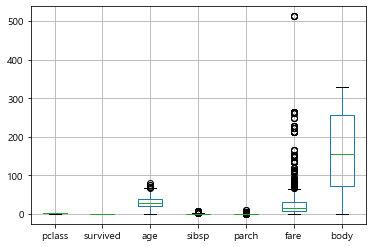

In [11]:
df.boxplot()

In [12]:
# 생존자를 카운트
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

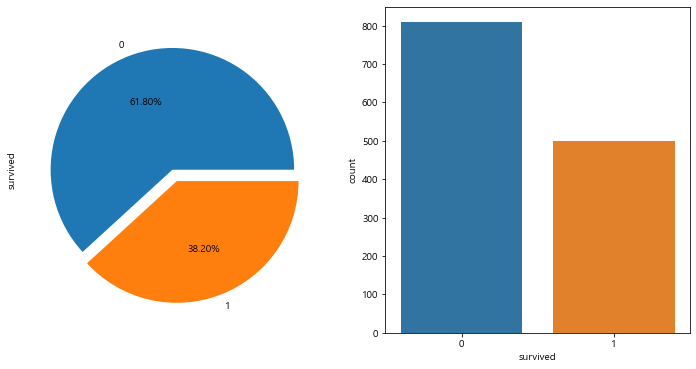

In [13]:
plt.figure(figsize=(12, 6)) # 12 대 6 으로 그래프 크기를 지정
plt.subplot(121)  # 1행 2열 1(첫번째)
df['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct="%.2f%%")
plt.subplot(122)  # 1행 2열 2(두번째)
sns.countplot('survived', data=df)
plt.show()

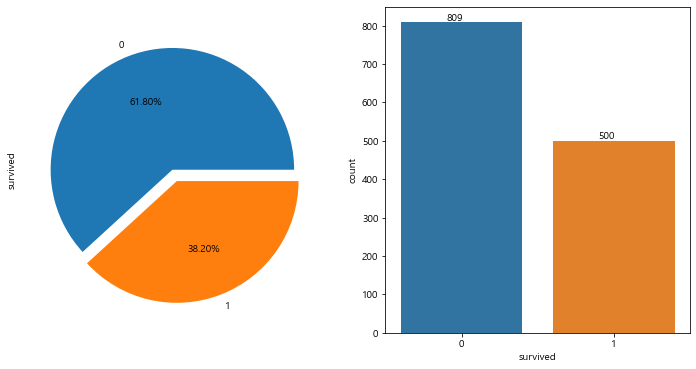

In [14]:
plt.figure(figsize=(12, 6)) # 12 대 6 으로 그래프 크기를 지정
plt.subplot(121)  # 1행 2열 1(첫번째)
df['survived'].value_counts().plot.pie(explode=[0, 0.1], autopct="%.2f%%")
plt.subplot(122)  # 1행 2열 2(두번째)
g1 = sns.countplot('survived', data=df)
for bar in g1.patches:
    g1.annotate(f"{bar.get_height()}", (bar.get_x()+0.3, bar.get_height()+5) ) # 내용, (X좌표,Y좌표)
plt.show()

<AxesSubplot:>

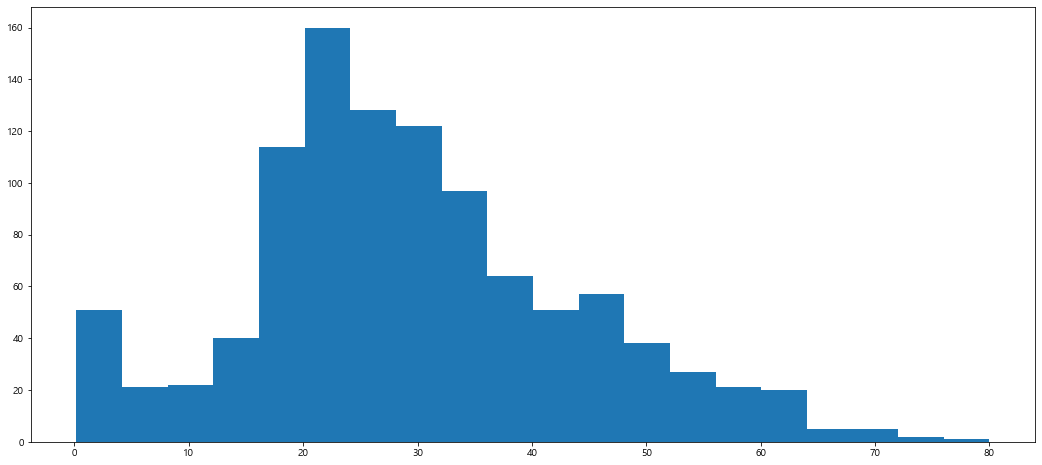

In [15]:
# 나이 그래프
df['age'].hist(figsize=(18, 8), bins=20, grid=False)

In [16]:
# 선실등급에 따라 생존에 영향은?
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [17]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


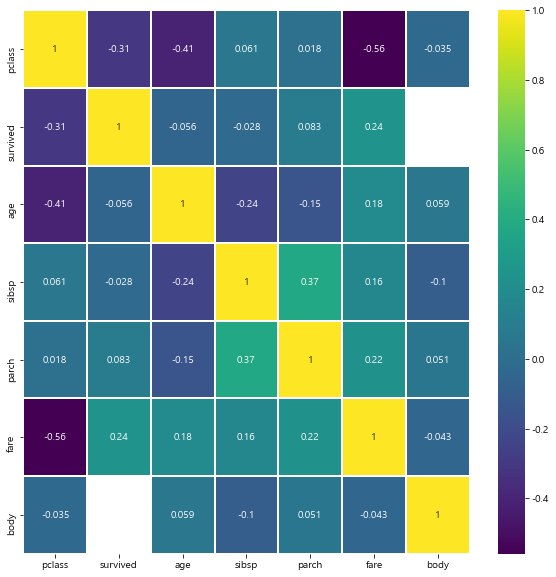

In [18]:
# 히트맵 : 온도 지도
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), linewidths=0.01, annot=True, cmap=plt.cm.viridis)
plt.show()

In [19]:
# 나이(연속형, 실수) ==> 범주형(연령대)
df['age_cat'] = pd.cut(df['age'],bins=[0,10,20,50,100],include_lowest=True,
                       labels=['baby','teenage','adult','old'])

In [20]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


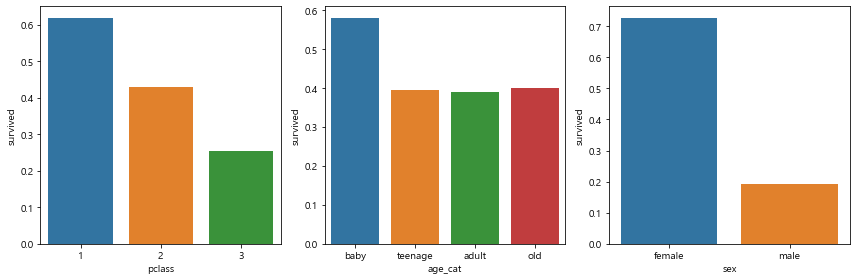

In [21]:
# 선실등급, 연령대, 성별에 따른 생존 그래프
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data=df, ci=None)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=df, ci=None)
plt.subplot(133)
sns.barplot('sex', 'survived', data=df, ci=None)
plt.tight_layout()
plt.show()

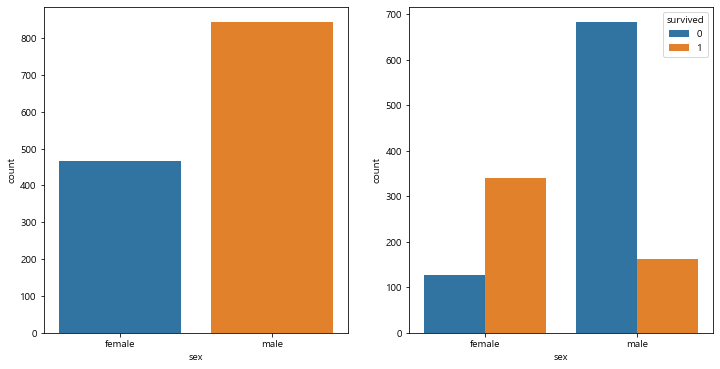

In [22]:
# 남여 비교 그래프
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.countplot('sex', data=df)
plt.subplot(122)
sns.countplot('sex', hue='survived', data=df)
plt.show()

In [23]:
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [24]:
df[ ['sex', 'survived'] ].groupby(['sex']).mean()

,survived
sex,
female,0.727468
male,0.190985


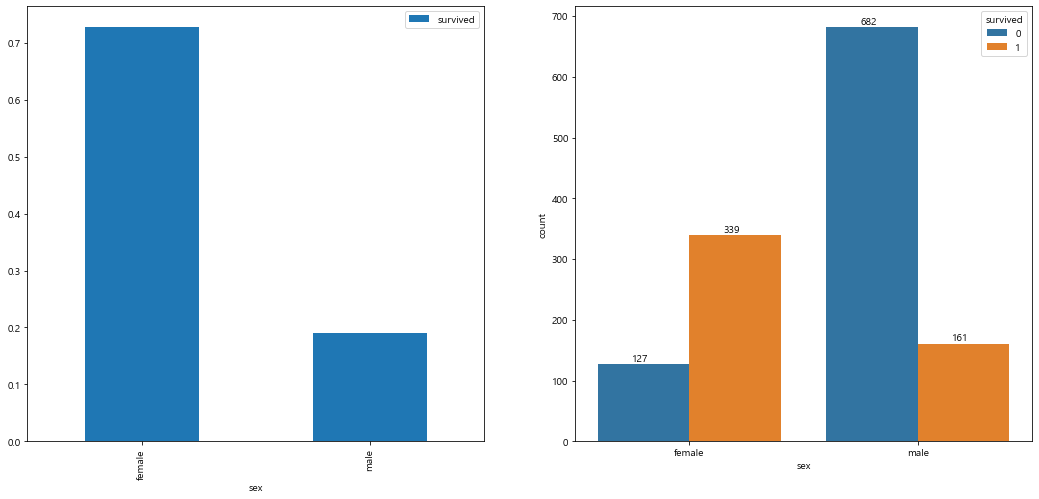

In [25]:
# 시각화
plt.figure(figsize=(18,8))
sub1 = plt.subplot(121)
df[ ['sex', 'survived'] ].groupby(['sex']).mean().plot.bar(ax=sub1)
plt.subplot(122)
g1 = sns.countplot('sex', hue='survived', data=df)
for bar in g1.patches:
    g1.annotate(f"{bar.get_height()}", (bar.get_x()+0.15, bar.get_height()+5))
plt.show()

In [26]:
pd.crosstab(df['pclass'], df['survived'])

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


In [27]:
pd.crosstab(df['pclass'], df['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


<AxesSubplot:xlabel='pclass'>

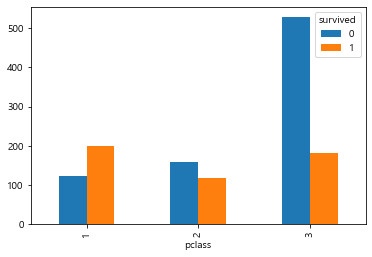

In [28]:
pd.crosstab(df['pclass'], df['survived']).plot(kind='bar')

In [29]:
# 남여를 숫자로 바꾸자, 남자(male)는 0으로 여자(female)는 1로 변경
df['sex'] = df['sex'].map( { 'female':1, 'male':0 } ) 

In [30]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [31]:
# 결측치 처리

In [32]:
# 나이가 결측치인 사람의 나이를 채운다
# name 컬럼의 이니셜(Mr. , Mrs. , Miss. 등)을 얻어서 연령대 별로 평균을 얻어서 결측치를 채운다.

In [33]:
df['initial'] = 0
for i in df:
    df['initial'] = df['name'].str.extract("([A-Za-z]+)\.")
    # 정규식을 사용, 뒷부분에 점이있는 영문을 뽑는다(예: Mr.)

In [34]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage,Miss
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult,Mr
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult,Mr


In [35]:
# df['initial'] 과 df.initial 은 같은 뜻

In [36]:
pd.crosstab(df['initial'], df['sex'])

sex,0,1
initial,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [37]:
pd.crosstab(df.initial, df.sex)

sex,0,1
initial,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [38]:
# .T 는 transpose
pd.crosstab(df.initial, df.sex).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
0,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1
1,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0


In [39]:
# Capt	Col	Countess	Don	Dona	Dr	Jonkheer	Lady	Major	Master	Miss	Mlle	Mme	Mr	Mrs	Ms	Rev	Sir

In [40]:
initial = [ 'Capt', 'Col', 'Countess', 'Don', 'Dona',
            'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
            'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs',
            'Ms', 'Rev', 'Sir']

In [41]:
for i in initial:
    print( i, df[ df['initial'] == i ]['age'].isnull().sum() )

Capt 0
Col 0
Countess 0
Don 0
Dona 0
Dr 1
Jonkheer 0
Lady 0
Major 0
Master 8
Miss 50
Mlle 0
Mme 0
Mr 176
Mrs 27
Ms 1
Rev 0
Sir 0


In [42]:
# 전체 이니셜을 Master(아이), Miss(미혼여성), Mrs(기혼여성), Mr(남성), Other(기타) 로 변경한다.
before = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle',
          'Mme', 'Ms', 'Rev', 'Sir']
after = ['Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Other', 'Mr', 'Miss', 'Mr', 'Mrs',
         'Miss', 'Miss', 'Other', 'Mr']
df['initial'].replace(before, after, inplace=True) # inplace=True 는 변경된 값을 저장하라

In [43]:
# Master 는 어린 아이에게 붙이는 칭호. Master의 평균 나이 출력
df[ df['initial'] == 'Master' ]['age'].mean()

5.482703773584906

In [44]:
# 이니셜 별 평균 나이 출력
df.groupby('initial')['age'].mean()

initial
Master     5.482704
Miss      22.016745
Mr        32.569374
Mrs       36.820809
Other     42.333333
Name: age, dtype: float64

In [45]:
# 결측치를 채운다. 각각의 평균값으로.
df.loc[ ( df['age'].isnull() ) & ( df['initial']=='Master' ), 'age' ] = 5
df.loc[ ( df['age'].isnull() ) & ( df['initial']=='Miss' ), 'age' ] = 22
df.loc[ ( df['age'].isnull() ) & ( df['initial']=='Mr' ), 'age' ] = 33
df.loc[ ( df['age'].isnull() ) & ( df['initial']=='Mrs' ), 'age' ] = 37
df.loc[ ( df['age'].isnull() ) & ( df['initial']=='Other' ), 'age' ] = 42

In [46]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
age_cat       263
initial         0
dtype: int64

In [47]:
# 나이가 결측치인 사람 빼고 나머지 담기
# df = df[ df['age'].notnull() ] # age 가 결측치인 263명을 빼고 있는 사람들만 담는다.

In [48]:
# 운임이 결측치인 사람 빼고 나머지 담기
# df = df[ df['fare'].notnull() ]
df.dropna(subset=['fare'], inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1308 non-null   int64   
 1   survived   1308 non-null   int64   
 2   name       1308 non-null   object  
 3   sex        1308 non-null   int64   
 4   age        1308 non-null   float64 
 5   sibsp      1308 non-null   int64   
 6   parch      1308 non-null   int64   
 7   ticket     1308 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1306 non-null   object  
 11  boat       486 non-null    object  
 12  body       120 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1045 non-null   category
 15  initial    1308 non-null   object  
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 165.0+ KB


In [50]:
# 플러스 알파로 머신러닝 코드 실습

In [51]:
# 1. 훈련 데이터와 테스트 데이터로 분리
# 2. 어떤 알고리즘을 사용할 지 결정
# 3. 훈련
# 4. 점수
# 5. 새 데이터로 예측

In [52]:
# 선실등급, 성별, 나이, 부부형제자매_수, 부모자식_수, 운임
x_cols = [ 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare' ]
X = df[ x_cols ].values

In [53]:
X

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 211.3375],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 151.55  ],
       ...,
       [  3.    ,   0.    ,  26.5   ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  27.    ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  29.    ,   0.    ,   0.    ,   7.875 ]])

In [54]:
y = df[ 'survived' ].values

In [55]:
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# 1. 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 10%를 훈련 데이터 사용

In [58]:
# 2. 어떤 ML 알고리즘을 사용할 것인가?
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree = DecisionTreeClassifier(max_depth=3) # over fitting(과학습)을 방지하기 위해 3층까지만 학습

In [60]:
# 3. 훈련
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
# 4. 점수
tree.score(X_test, y_test) # 0.7633587786259542 ==> 76% 정확도, 76점 맞음.

0.7938931297709924

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train, y_train)
print("훈련 점수:", tree.score(X_train, y_train))
print("테스트 점수:", tree.score(X_test, y_test))

훈련 점수: 0.8496176720475785
테스트 점수: 0.816793893129771


In [63]:
# 5. 새 데이터로 예측

In [64]:
# 디카프리오 정보로 생존을 예측 : 디카프리오는 살 수 있었나?
# 3등실, 남자(0), 19살, 형제(0), 부모(0), 운임10달러
dicaprio = [[3, 0, 19, 0, 0, 10]]
result = tree.predict_proba(dicaprio)
print(result) # [[0.8800738 0.1199262]] ==> [[사망확률, 생존확률]]
print(f"생존 확률={result[0][1]*100:.3f}%")

[[0.89005236 0.10994764]]
생존 확률=10.995%


In [65]:
# 여주인공 윈슬릿은?
# 1등실, 여자(1), 17살, 형제(1), 부모(2), 운임 100달러
winslet = [[1, 1, 17, 1, 2, 100]]
result = tree.predict_proba(winslet)
print(result) # [[0.01935484 0.98064516]] ==> [[사망확률, 생존확률]]
print(f"생존 확률={result[0][1]*100:.3f}%")

[[0.00840336 0.99159664]]
생존 확률=99.160%


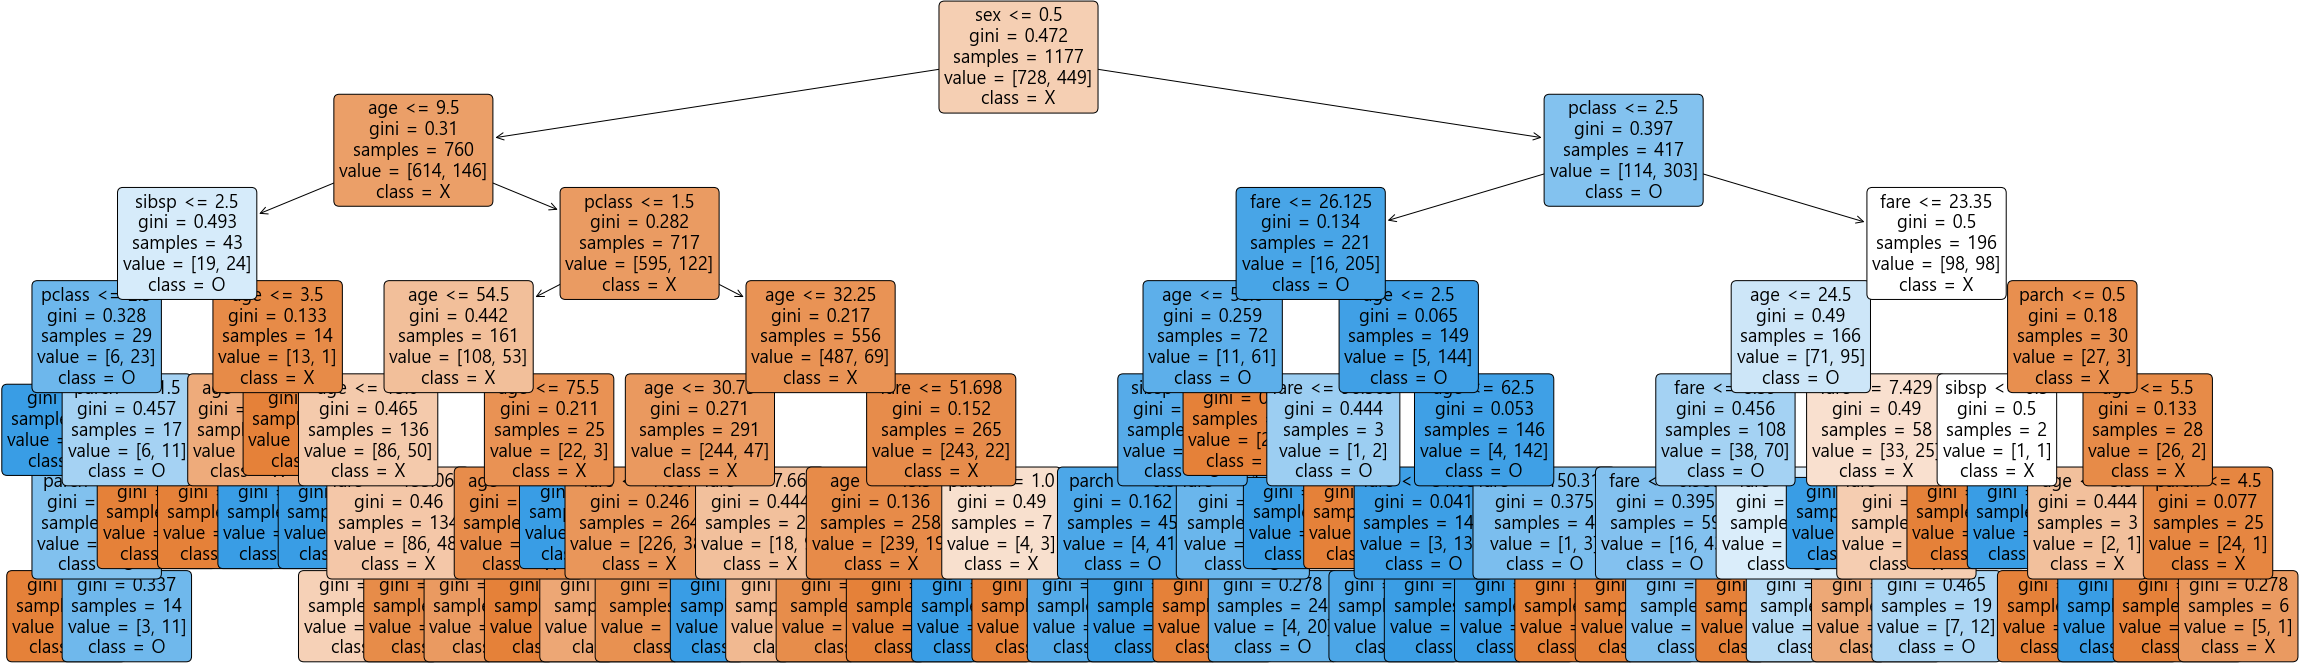

In [66]:
# 의사결정 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 12))
plot_tree(tree, feature_names=x_cols, class_names=['X', 'O'], filled=True, rounded=True, fontsize=18)
plt.show()

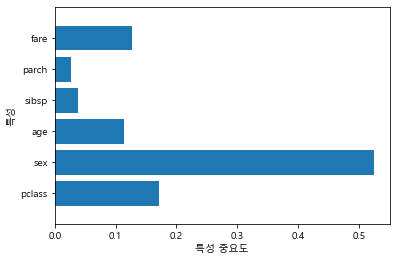

In [67]:
def plot_feature_importances_cancer(model):
    n_features = len(x_cols)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [68]:
# end